In [1]:
from car import Car
from road import Road
from simulation import Simulation
import numpy as np
from unittest import mock
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:

def make_cars(num=10, slowing_chance=0.2, desired_speed=33.333, length=1000):
    road = Road(length=length)
    start_positions = list(np.linspace(length,0,num+1))[1:]
    cars = []
    for i in start_positions:
        car = Car(road, position=i, slowing_chance=slowing_chance, desired_speed=desired_speed) # reverse order required here...
        cars.append(car)
    return cars

In [4]:
def run_sim(discard_steps=60, run_steps=300):
    sim = Simulation(cars=cars, steps=discard_steps)
    sim.start()
    sim.run()

    sim = Simulation(cars=cars, steps=run_steps)

    sim.start()
    positions, speeds = sim.run()
    return positions, speeds

In [5]:
def plot_sim(title):
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title(title)
    for i in range(0, len(cars), 5):
        plt.scatter(range(len(positions)), positions[:,i], marker='_')#, speeds[:,i])
        plt.scatter(range(len(positions)), positions[:,i+1], c='r', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+2], c='g', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+3], c='y', marker='_')#, speeds[:,i+1], c='g')
        plt.scatter(range(len(positions)), positions[:,i+4], c='m', marker='_')#, speeds[:,i+1], c='g')
        plt.subplots_adjust(left=2, right=4)
    avg = speeds[:, 0].mean()
    stdev = speeds[:, 0].std()
    print('mean: {} std: {}'.format(avg, stdev))
    return avg, stdev

In [81]:
n = 30
sc = 0.1
ds = 33.333
cars = make_cars(n, slowing_chance=sc, desired_speed=ds)

In [82]:
%%capture
positions, speeds = run_sim(discard_steps=60, run_steps=1000)

mean: 28.801531468531458 std: 4.500777903820541


(28.801531468531458, 4.5007779038205413)

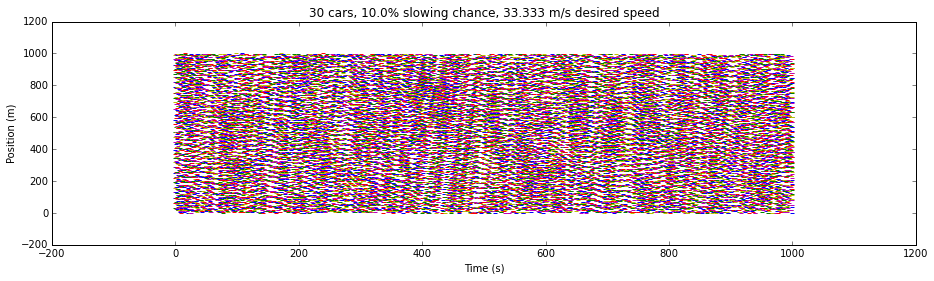

In [83]:
plot_sim('{} cars, {}% slowing chance, {} m/s desired speed'.format(n, sc*100, ds))